In [27]:
# We'll be using the interact function which comes as a decorator in python.
from ipywidgets import interact
import ipywidgets as widgets

# Now, we're going to look at a small dataset which I collected of my biking data
import pandas as pd
import matplotlib.pyplot as plt

# The dataset is actually pretty important to me, because while I was biking in 2019
# I went into a roundabout - a traffic circle - a little too fast and completely wiped
# out. This makes it a great thing to visualize!
df=pd.read_csv("resource/wipeout.csv")
df=df.set_index(pd.to_datetime(df["timestamp"]))
df.head()

,timestamp,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,speed,timestamp.1,position_lat_degrees,position_long_degrees
timestamp,,,,,,,,,,,,,
2019-11-01 20:12:03,2019-11-01 20:12:03,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:03,42.280368,-83.740727
2019-11-01 20:12:04,2019-11-01 20:12:04,NaN,0.00,281.6,0.000,NaN,84.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:04,42.280368,-83.740727
2019-11-01 20:12:07,2019-11-01 20:12:07,NaN,0.00,281.6,0.000,NaN,87.0,504424439.0,-999065791.0,NaN,2019-11-01 20:12:07,42.280368,-83.740727
2019-11-01 20:12:08,2019-11-01 20:12:08,NaN,0.32,281.6,1.036,NaN,88.0,504424447.0,-999065835.0,NaN,2019-11-01 20:12:08,42.280369,-83.740731
2019-11-01 20:12:10,2019-11-01 20:12:10,NaN,3.30,281.8,2.976,NaN,89.0,504424476.0,-999066382.0,NaN,2019-11-01 20:12:10,42.280371,-83.740777


The dataset is made up of time and a set of sensors I was wearing while I was riding. These sensors picked up details such as my position and elevation, my speed, my heart rate, and more. I assume everyone goes for a bike ride like this.

In [28]:
# Pandas has some build in support for plotting, but needs to be able to "talk" matplotlib.
# We do this by indicating that we want our pandas plots to convert automatically for us
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [29]:
# Not all of the columns in my dataframe are good to visualize in a line plot. So I'm going
# to iterate through my dataframe and just keep a list of the columns which are not of type
# object (e.g. the column is a number)
potential_columns=[]
for col in df.columns:
    if df[col].dtype != "object":
        potential_columns.append(col)

In [30]:
# Ok, now I want to write a plot wrapper function. This function is going to plot
# one or two columns, never more. If there is a single column passed in it will
# plot that in blue (default color), but if there are two it's going to plot the
# one column of data on top of the other, with the second column being in red. We're
# going to use the plt.twinx() function here to ensure the x axis is the same (it's
# going to be time, the dataframe index), but that the y axis can be unique for each
# series of data.
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])

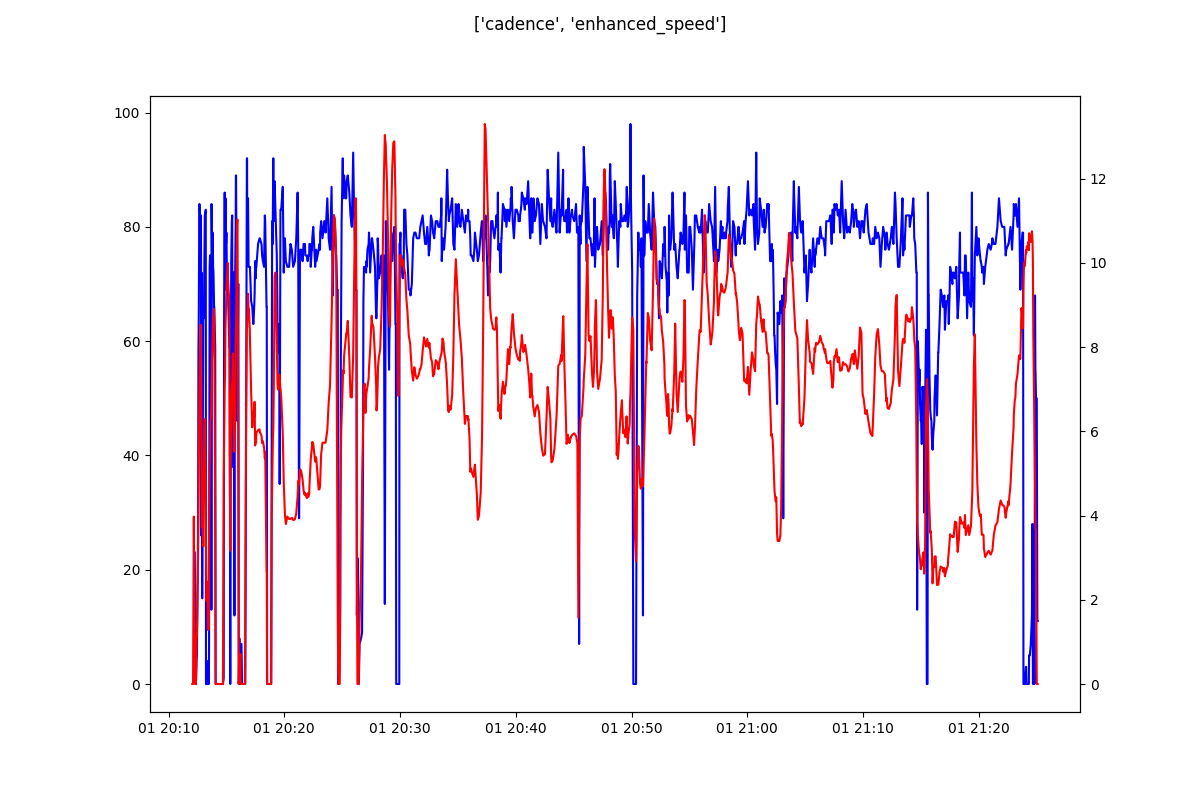

In [31]:
# Now let's just look at one example of two columns of data, say cadence versus
# speed
plot_data(["cadence","enhanced_speed"])

Ok, it's pretty messy, but we can see that there is on moment out down around time 21:05 where cadence and speed did drop together. But let's get to the interactive part.

In [33]:
# To make this interactive we can "wrap" this function with the @interact() decorator.
# A decorator in python is just a function which wraps another function, and the ipython
# team has written this one for us, it allows us to provide a new SelectMultiple widget
# and use whatever is selected there as a parameter to plot_data. We set this up by
# putting the decorator in front of the plot_data function definition, so I'm going to do
# a little copy and paste here.

# The SelectMultiple widget has three parameters, the set of options which are legal
# (so this will be our potential column names) the values we want passed in (and time
# will always be our first value we want passed in, followed by whatever other values
# are selected), and some descriptive string.
@interact(col_names=widgets.SelectMultiple(
    options=potential_columns,
    value=(potential_columns[0],),
    description='Columns'))
def plot_data(col_names):
    plt.figure(figsize=[12,8])
    plt.gcf().suptitle(str(col_names))
    if len(col_names) ==2:
        plt.plot(df[list(col_names)[0]],'b')
        ax=plt.twinx()
        ax.plot(df[list(col_names)[1]],'r')
    else:
        plt.plot(df[list(col_names)])
    plt.show()



interactive(children=(SelectMultiple(description='Columns', index=(0,), options=('cadence', 'distance', 'enhan…

Nice! Now we can explore and look at any two columns we might want. Of course, SPLOMs do give us some of this with small multiples, so you shouldn't discount that. But sometimes a dashboard can engage your reader in a different way, and let them see a slightly larger view of the data.

In [34]:
# Lets look at one more example. Here I'm going to use a widget called an IntRangeSlider
# which allows the reader to set a lower and upper bounds for something. I've written a
# lot here and you can check the docs for more, but in this case I'm going to look at a
# plot of my heart rate, where the reader gets to see all places between 80 and 100 but
# can change this to filter based on values they are interested in. I'm also going to
# create a text widget that allows them to set the start and end time, so you can zoom
# in on a time of interest.
@interact(heart_rate_bounds=widgets.IntRangeSlider(
    value=[80, 100],
    min=0,
    max=180,
    step=1,
    description='HR Range:',
    continuous_update=False,
    readout_format='d',),
    start=widgets.Text(
    value=str(df.index[0]),
    description='Start Time:'),
    end=widgets.Text(
    value=str(df.index[-1]),
    description='End Time:'))

def plot_hr(heart_rate_bounds, start, end):
    plt.figure(figsize=[12,8])
    
    plt.xlim(left=df.index[0],right=df.index[-1])
    plt.ylim(0,max(df["heart_rate"]))
    
    ndf=df[(df["heart_rate"]>heart_rate_bounds[0]) & 
           (df["heart_rate"]<heart_rate_bounds[1]) & 
           (df.index>start) & (df.index<end)]
    plt.scatter(ndf.index,ndf["heart_rate"])
    plt.show()

interactive(children=(IntRangeSlider(value=(80, 100), continuous_update=False, description='HR Range:', max=18…

Ok, that was a pretty whirwind demo of Juptyer widgets. The ecosystem for widgets is far from finished, but functionality is being added all of the time. I wanted to include this here because it's starting to get a bit more mature, and honestly, it's visuals like plots and charts that people want to use these widgets for. I hope you'll take a look and poke around with what is available, and maybe share your findings and creations with myself and the other students in the class.

# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
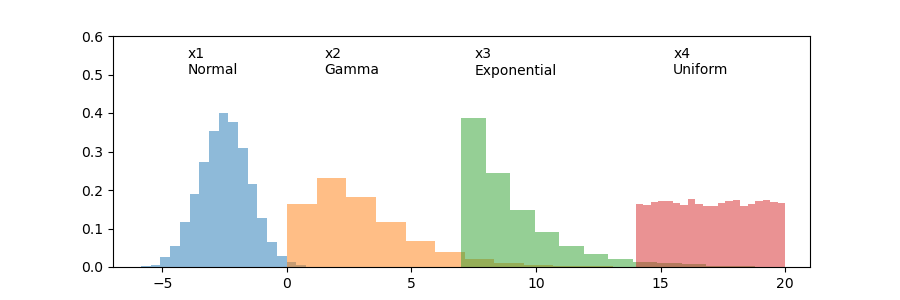

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform');

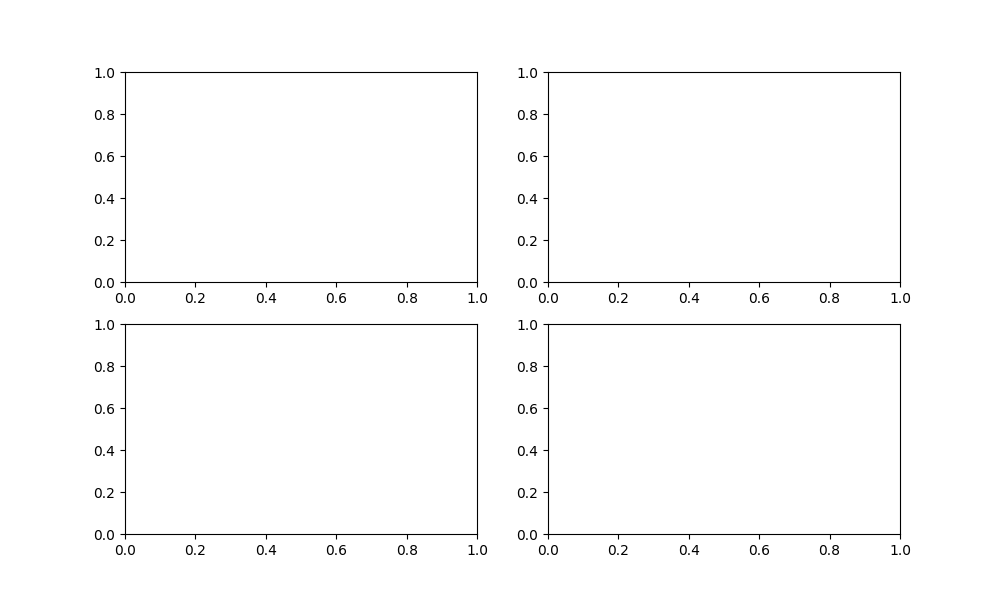

In [210]:
def update(frame):
    
    if frame == 20: 
        a.event_source.stop()
        
    sample = frame*100
    bins = [10, 20, 30, 40, 50]

    plt.subplot(2,2,1)
    plt.cla()
    plt.hist(d_normal[:sample], bins=bins[frame//5], alpha=0.5, color='blue', density=True);
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,2)
    plt.cla()
    plt.hist(d_gamma[:sample], bins=bins[frame//5], alpha=0.5, color='green', density=True);
    plt.gca().set_title('Sampling the Gamm Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,3)
    plt.cla()
    plt.hist(d_exp[:sample], bins=bins[frame//5], alpha=0.5, color='orange', density=True);
    plt.gca().set_title('Sampling the Exponential Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    plt.subplot(2,2,4)
    plt.cla()
    plt.hist(d_unif[:sample], bins=bins[frame//5], alpha=0.5, color='red', density=True);
    plt.gca().set_title('Sampling the Uniform Distribution')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

    
    plt.suptitle('Distributions (n sample = {})'.format(sample), fontsize=20)
    plt.tight_layout()

    
d_normal = np.random.normal(0, 2, 2000)
d_gamma = np.random.gamma(2, 1.5, 2000)
d_exp = np.random.exponential(2, 2000)
d_unif = np.random.uniform(0,10, 2000)

plt.subplots(2,2, figsize=(10,6), sharex=False, sharey=False)  
    
# Quick to start
a = animation.FuncAnimation(plt.gcf(), update, interval=100)

# Now tell the widget back end it's time to show!
plt.show()